# Web Crawing

웹 페이지에서 데이터를 수집하는 방법에 대해서 학습합니다.

### 웹크롤링의 개념

- requests 이용
    - 정적인 페이지를 크롤링하는 방법
    - 받아오는 문자열에 따라 두가지 방법으로 구분
        - json(python의 dictionary와 같은 포멧) 문자열로 받아서 파싱하는 방법
        - html 문자열로 받아서 파싱하는 방법
- selenium 이용
    - 동적인 페이지를 크롤링하는 방법
    - 브라우져를 직접 열어서 데이터를 받는 방법
    
* 정적인 페이지와 동적인 페이지의 차이
    - 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지
    - 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

### Index


1. 패키지 설치
1. reqeusts 모듈

## 1. 패키지 설치
- Anaconda Python에 requests, bs4가 이미 설치되어있습니다.
- 일반적인 Python이 설치된 경우 아래의 명령을 터미널에서 실행하여 패키지를 설치해 주세요.

```
$ pip install requests bs4
```

- 설치가 완료되면 아래의 패키지를 import 해주세요.

In [1]:
import requests

## 2. requests 모듈
- 네이버 코스피 데이터 수집
- 네이버 코스닥 데이터 수집
- 네이버 달러 환율 데이터 수집
- 종가 데이터 정규화

#### 네이버 주식데이터 크롤링
- 크롬 개발자 도구로 서비스에서 사용중인 API(application programing interface)를 이용하여 크롤링하는 방법을 학습
    - application programing interface : 어플리케이션 프로그래밍 사이에 데이터를 주고 받는 방법
- 네이버 증권 모바일 페이지에서 코스피 주가 데이터 크롤링
- pc 버전의 웹페이지가 복잡하면, mobile 페이지를 보시면 더 단순합니다.
    - pc 버전 : https://finance.naver.com/
    - mobile 버전 : https://m.stock.naver.com/    
- 코스피 주가 데이터 웹페이지 분석
    1. https://m.stock.naver.com/sise/siseIndex.nhn?code=KOSPI 페이지로 이동
    1. chrome 개발자도구를 열고 Network Tab에서 XHR을 선택
    1. 웹 페이지에서 더보기 버튼을 클릭하면 API를 주고 받음을 확인
        - 웹에서는 대부분 json 포멧으로 데이터를 주고 받음
        - json 포멧은 python의 dictionary와 비슷, (key, value) 형태의 데이터
    1. 사용되는 URL을 확인해서 requests에 사용할 URL을 만듦
- 코스피 주가 데이터 크롤링 절차
    1. URL 만드는 함수
    1. requests를 이용하여 데이터 가져옴
    1. 가져온 데이터의 컬럼을 변경
    1. 데이터 저장
    1. 그래프 그리기

### 2.1 네이버 코스피 데이터 수집

- 최근 20일간 코스피 데이터를 크롤링
- 크롤링 절차
    - URL 만들기
    - json 데이터 가져오기
    - json 포멧의 문자열을 dictionary 데이터 타입으로 파싱
    - dictionary 데이터 데이터 프레임으로 만들기
- 고가, 저가, 종가, 시가를 그래프로 그려기
- datas 디렉토리에 kospi.pkl 파일로 저장
- 컬럼 데이터
```
columns = {
    "cd": "시장",
    "cv": "전일대비",
    "cr": "등락률",
    "dt": "날짜",
    "hv": "고가",
    "lv": "저가",
    "ncv": "종가",
    "ov": "시가",
}
```

URL 만드는 함수

In [2]:
def make_url(page_size=20, page=1):
    return "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize={}&page={}"\
        .format(page_size, page)

In [3]:
# test code
make_url(30, 2)

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=30&page=2'

json 데이터를 가져오는 함수

- response status
    - 200 - 성공
    - 404 - 서버가 없음(URL이 잘못됨)
    - 500 - 서버는 있는데 서버에서 거절(에러)

In [4]:
url = make_url(20, 1)
url

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1'

In [5]:
# url에 해당하는 문자열 가져오기
response = requests.get(url)
response

<Response [200]>

In [6]:
# json 포멧의 문자열을 dictionary 데이터 타입으로 바꿈
kospi_json = response.json()
type(kospi_json)

dict

In [7]:
# dictionary 데이터 타입의 데이터에서 필요한 데이터만 가져옴
kospi = kospi_json["result"]["siseList"]
len(kospi)

20

In [8]:
# 데이터 확인
kospi[:2]

[{'cd': 'KOSPI',
  'dt': '20191022',
  'ncv': 2082.08,
  'cv': 17.24,
  'cr': 0.83,
  'ov': 2076.29,
  'hv': 2087.46,
  'lv': 2073.08},
 {'cd': 'KOSPI',
  'dt': '20191021',
  'ncv': 2064.84,
  'cv': 4.15,
  'cr': 0.2,
  'ov': 2067.97,
  'hv': 2067.97,
  'lv': 2059.33}]

In [10]:
import pandas as pd

In [11]:
# 가져온 데이터 데이터 프레임으로 만들기
df = pd.DataFrame(kospi)
df.tail(2)

,cd,cr,cv,dt,hv,lv,ncv,ov
18,KOSPI,0.45,9.34,20190924,2101.63,2085.91,2101.04,2090.19
19,KOSPI,0.01,0.18,20190923,2095.54,2085.60,2091.70,2087.70


In [12]:
def get_kospi(url):

    # url에 해당하는 문자열 가져오기
    response = requests.get(url)

    # json 객체 형태로 파싱(문자열을 dictionary 데이터 타입으로 변경)
    kospi_json = response.json()

    # result와 siseList에 해당되는 데이터를 선택
    kospi = kospi_json["result"]["siseList"]

    # json(dictionary)데이터 타입을 pandas의 데이터 프레임으로 변경
    return pd.DataFrame(kospi)

In [13]:
# test code
url = make_url(20, 1)
kospi_df = get_kospi(url)
print(len(kospi_df))
kospi_df.tail(2)

20


,cd,cr,cv,dt,hv,lv,ncv,ov
18,KOSPI,0.45,9.34,20190924,2101.63,2085.91,2101.04,2090.19
19,KOSPI,0.01,0.18,20190923,2095.54,2085.60,2091.70,2087.70


컬럼명 변경

In [14]:
columns = {
    "cd": "시장",
    "cv": "전일대비",
    "cr": "등락률",
    "dt": "날짜",
    "hv": "고가",
    "lv": "저가",
    "ncv": "종가",
    "ov": "시가",
}
kospi_df.rename(columns=columns, inplace=True)
kospi_df.tail(2)

,시장,등락률,전일대비,날짜,고가,저가,종가,시가
18,KOSPI,0.45,9.34,20190924,2101.63,2085.91,2101.04,2090.19
19,KOSPI,0.01,0.18,20190923,2095.54,2085.60,2091.70,2087.70


데이터 저장

In [15]:
import pickle

In [16]:
!rm -rf datas

In [17]:
# datas 디렉토리 만들기
!mkdir datas

In [18]:
# pickle을 이용하여 데이터 저장
with open("datas/kospi.pkl", "wb") as f:
    pickle.dump(kospi, f)

그래프 그리기

In [19]:
# 주피터 노트북에서 그래프를 그리기위한 설정

In [20]:
%matplotlib inline

In [21]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [22]:
# 그래프의 패키지를 import 하기
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# seaborn 적용
sns.set()

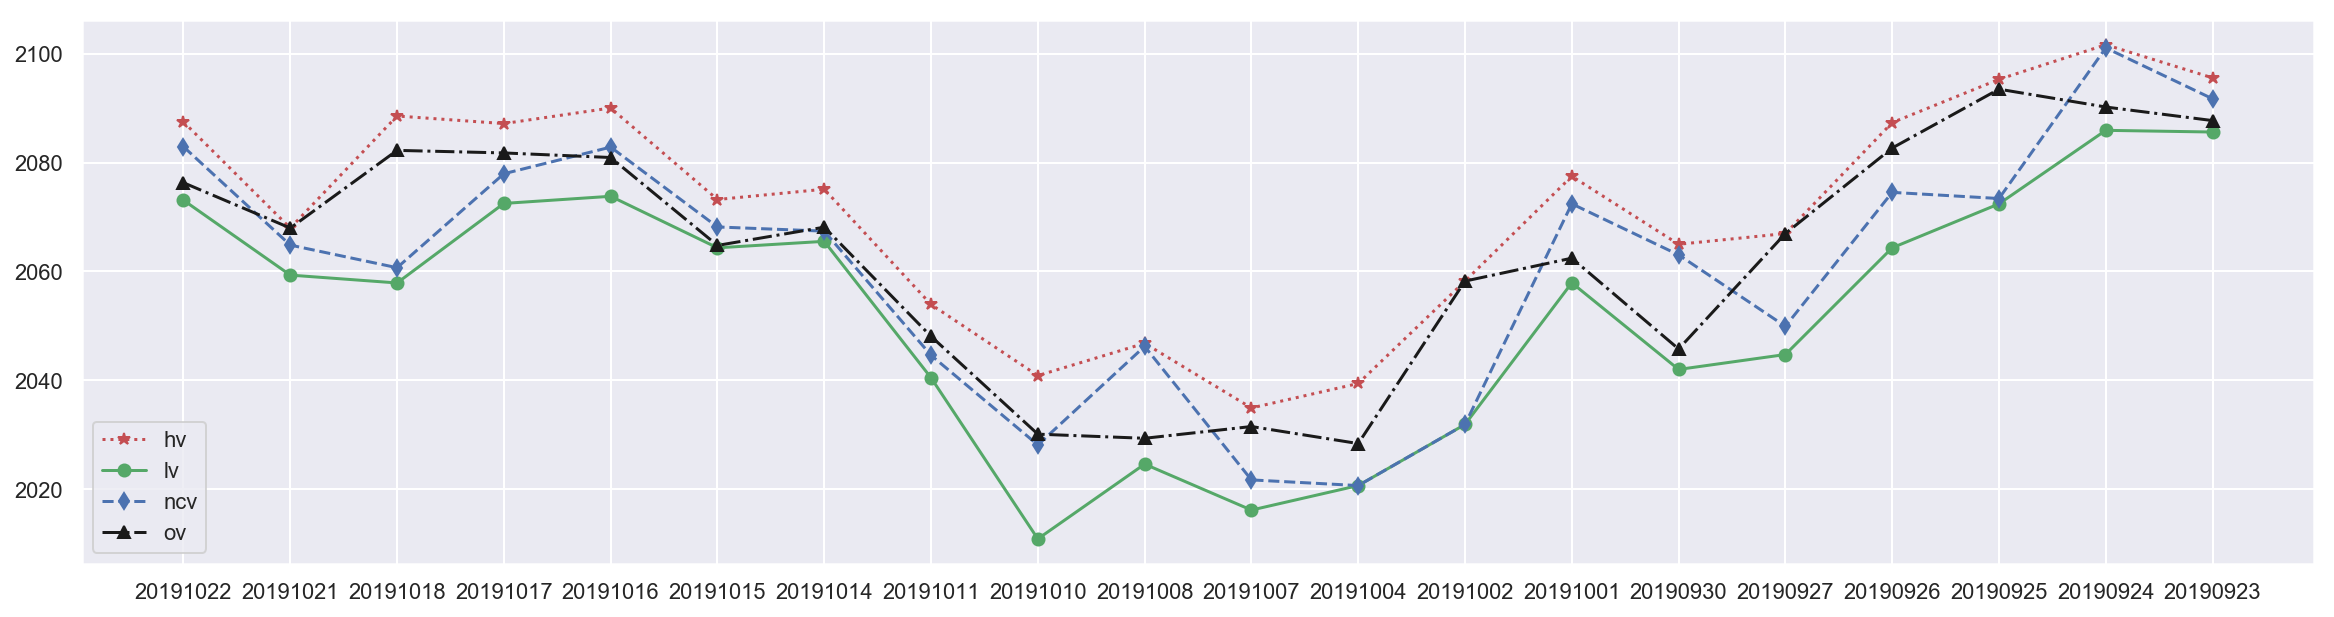

In [24]:
# 그려질 그래프의 크기를 설정
plt.figure(figsize=(20, 5))

# 그래프 데이터를 적용
plt.plot(kospi_df["날짜"], kospi_df["고가"], 'r*:', label="hv")
plt.plot(kospi_df["날짜"], kospi_df["저가"], 'go-', label="lv")
plt.plot(kospi_df["날짜"], kospi_df["종가"], 'bd--', label="ncv")
plt.plot(kospi_df["날짜"], kospi_df["시가"], 'k^-.', label="ov")

# 범례 설정
plt.legend(loc=0)

# 그래프를 그려줌
plt.show()

### 2.2 네이버 코스닥 데이터 수집
- 최근 20일간 코스닥 데이터를 크롤링
- 고가, 저가, 종가, 시가를 그래프로 그려기
- datas 디렉토리에 kosdaq.pkl 파일로 저장
- 컬럼 데이터
```
columns = {
    "cd": "시장",
    "cv": "전일대비",
    "cr": "등락률",
    "dt": "날짜",
    "hv": "고가",
    "lv": "저가",
    "ncv": "종가",
    "ov": "시가",
}
```

In [25]:
# 1. URL 만들기
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSDAQ&pageSize=20&page=1"

# 2. requests를 이용하여 문자열 데이터 가져오기
response = requests.get(url)
# response.text

# 3. json 형태의 문자열을 dictionary로 파싱(데이터의 형태를 바꾸는 행위)
kosdaq_json = response.json()
# print(type(kosdaq_json))
# kosdaq_json

# 4. dictionary 데이터 타입의 데이터에서 필요한 데이터 가져오기
kosdaq = kosdaq_json["result"]["siseList"]
# kosdaq

# 5. pandas의 DataFrame으로 만들어주기
kosdaq_df = pd.DataFrame(kosdaq)
kosdaq_df.tail(2)

,cd,cr,cv,dt,hv,lv,ncv,ov
18,KOSDAQ,-0.49,-3.16,20190924,646.60,641.17,641.85,643.45
19,KOSDAQ,-0.63,-4.06,20190923,649.22,644.39,645.01,648.81


In [26]:
# 6. column 데이터 수정하기
columns = {
  "cd": "시장",
  "cv": "전일대비",
  "cr": "등락률",
  "dt": "날짜",
  "hv": "고가",
  "lv": "저가",
  "ncv": "종가",
  "ov": "시가",
}
kosdaq_df.rename(columns=columns, inplace=True)
kosdaq_df.tail(2)

,시장,등락률,전일대비,날짜,고가,저가,종가,시가
18,KOSDAQ,-0.49,-3.16,20190924,646.60,641.17,641.85,643.45
19,KOSDAQ,-0.63,-4.06,20190923,649.22,644.39,645.01,648.81


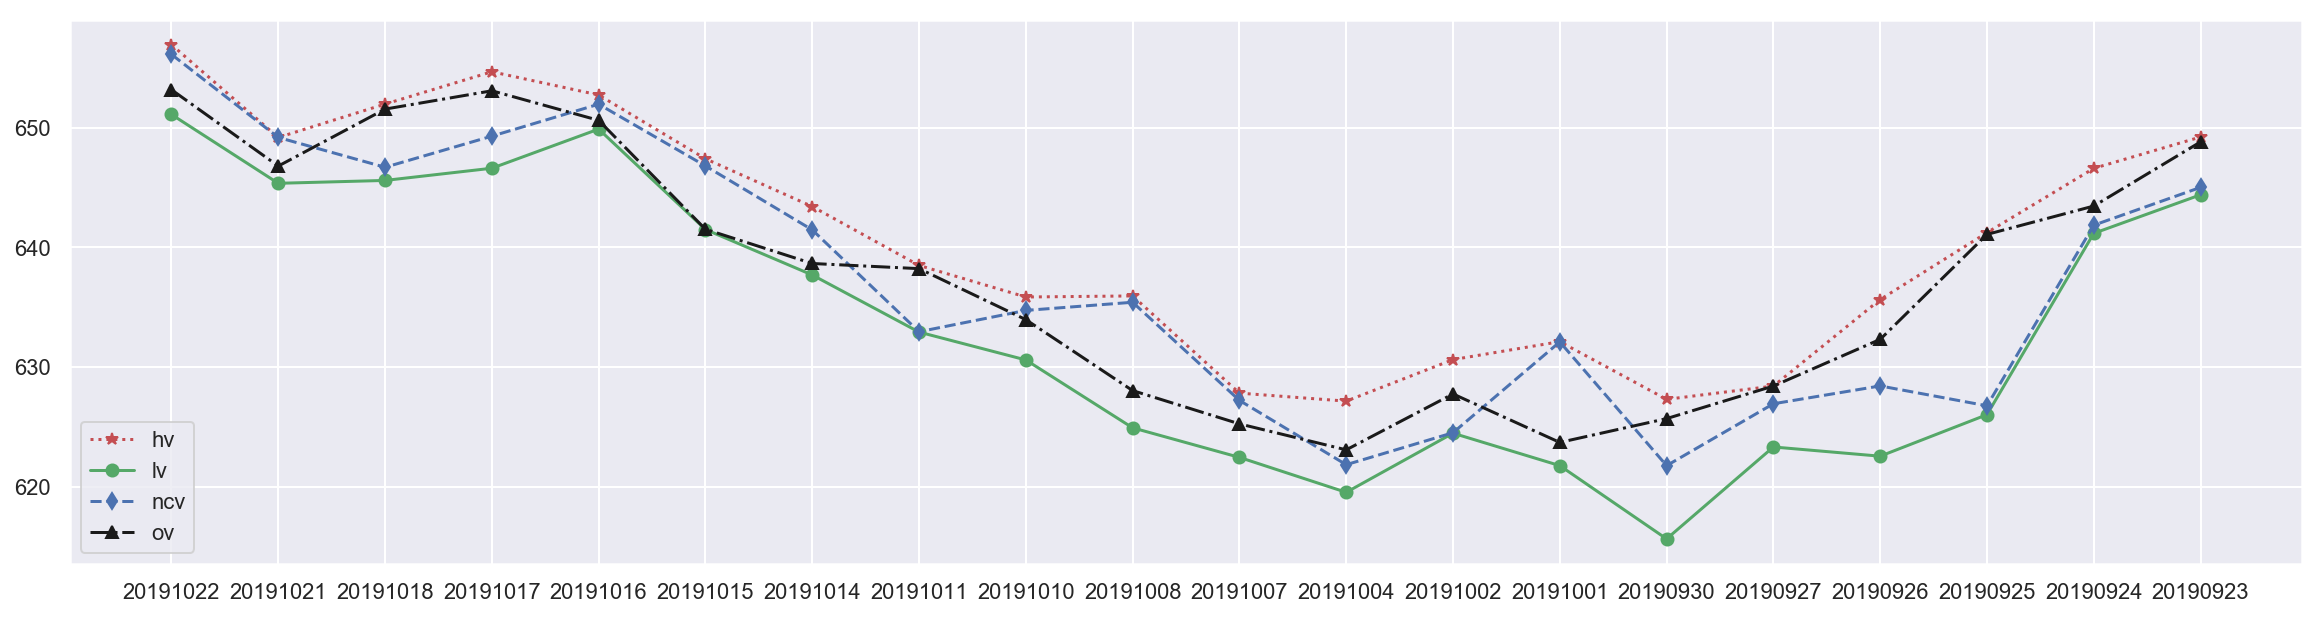

In [27]:
# 7. 고가, 저기, 종가, 시가 그래프로 그려주기

# 그려질 그래프의 크기를 설정
plt.figure(figsize=(20, 5))

# 그래프 데이터를 적용
plt.plot(kosdaq_df["날짜"], kosdaq_df["고가"], 'r*:', label="hv")
plt.plot(kosdaq_df["날짜"], kosdaq_df["저가"], 'go-', label="lv")
plt.plot(kosdaq_df["날짜"], kosdaq_df["종가"], 'bd--', label="ncv")
plt.plot(kosdaq_df["날짜"], kosdaq_df["시가"], 'k^-.', label="ov")

# 범례 설정
plt.legend(loc=0)

# 그래프를 그려줌
plt.show()

In [28]:
# 8. kosdaq 파일로 저장하기
with open("datas/kosdaq.pkl", "wb") as f:
    pickle.dump(kosdaq_df, f)

### 2.3 네이버 달러 환율 데이터 수집
- 최근 20일간 달러 환율 데이터를 크롤링
- 날짜별 종가를 그래프로 그리기
- datas 디렉토리의 usd_exchange_rate.pkl 파일로 저장
- 컬럼 데이터
```
columns = {
    "cbv": "현찰살때",
    "cr": "등락율",
    "csv": "현찰팔때",
    "cv": "전일대비",
    "dt": "날짜",
    "nv": "종가",
    "rv": "송금받을때",
    "sv": "송금보낼때",
}
```

In [29]:
# 1. URL 만들기
url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize=20&page=1"

# 2. requests를 이용하여 문자열 데이터 가져오기
response = requests.get(url)
# response.text

# 3. json 형태의 문자열을 dictionary로 파싱(데이터의 형태를 바꾸는 행위)
er_json = response.json()
# er_json

# 4. dictionary 데이터 타입의 데이터에서 필요한 데이터 가져오기
exchange_rate = er_json["result"]["marketIndexDay"]
# exchange_rate

# 5. pandas의 DataFrame으로 만들어주기
er_df = pd.DataFrame(exchange_rate)
er_df.tail(2)

,cbv,cr,csv,cv,dt,nv,rv,sv
18,1215.91,-0.21,1174.09,-2.5,20190924,1195.0,1183.3,1206.7
19,1218.45,0.76,1176.55,9.0,20190923,1197.5,1185.8,1209.2


In [30]:
# 6. column 데이터 수정하기
columns = {
  "cbv": "현찰살때",
  "cr": "등락율",
  "csv": "현찰팔때",
  "cv": "전일대비",
  "dt": "날짜",
  "nv": "종가",
  "rv": "송금받을때",
  "sv": "송금보낼때",
}

er_df.rename(columns=columns, inplace=True)
er_df.tail()

,현찰살때,등락율,현찰팔때,전일대비,날짜,종가,송금받을때,송금보낼때
15,1221.00,-0.04,1179.00,-0.5,20190927,1200.0,1188.3,1211.7
16,1221.50,0.00,1179.50,0.0,20190926,1200.5,1188.8,1212.2
17,1221.50,0.46,1179.50,5.5,20190925,1200.5,1188.8,1212.2
18,1215.91,-0.21,1174.09,-2.5,20190924,1195.0,1183.3,1206.7
19,1218.45,0.76,1176.55,9.0,20190923,1197.5,1185.8,1209.2


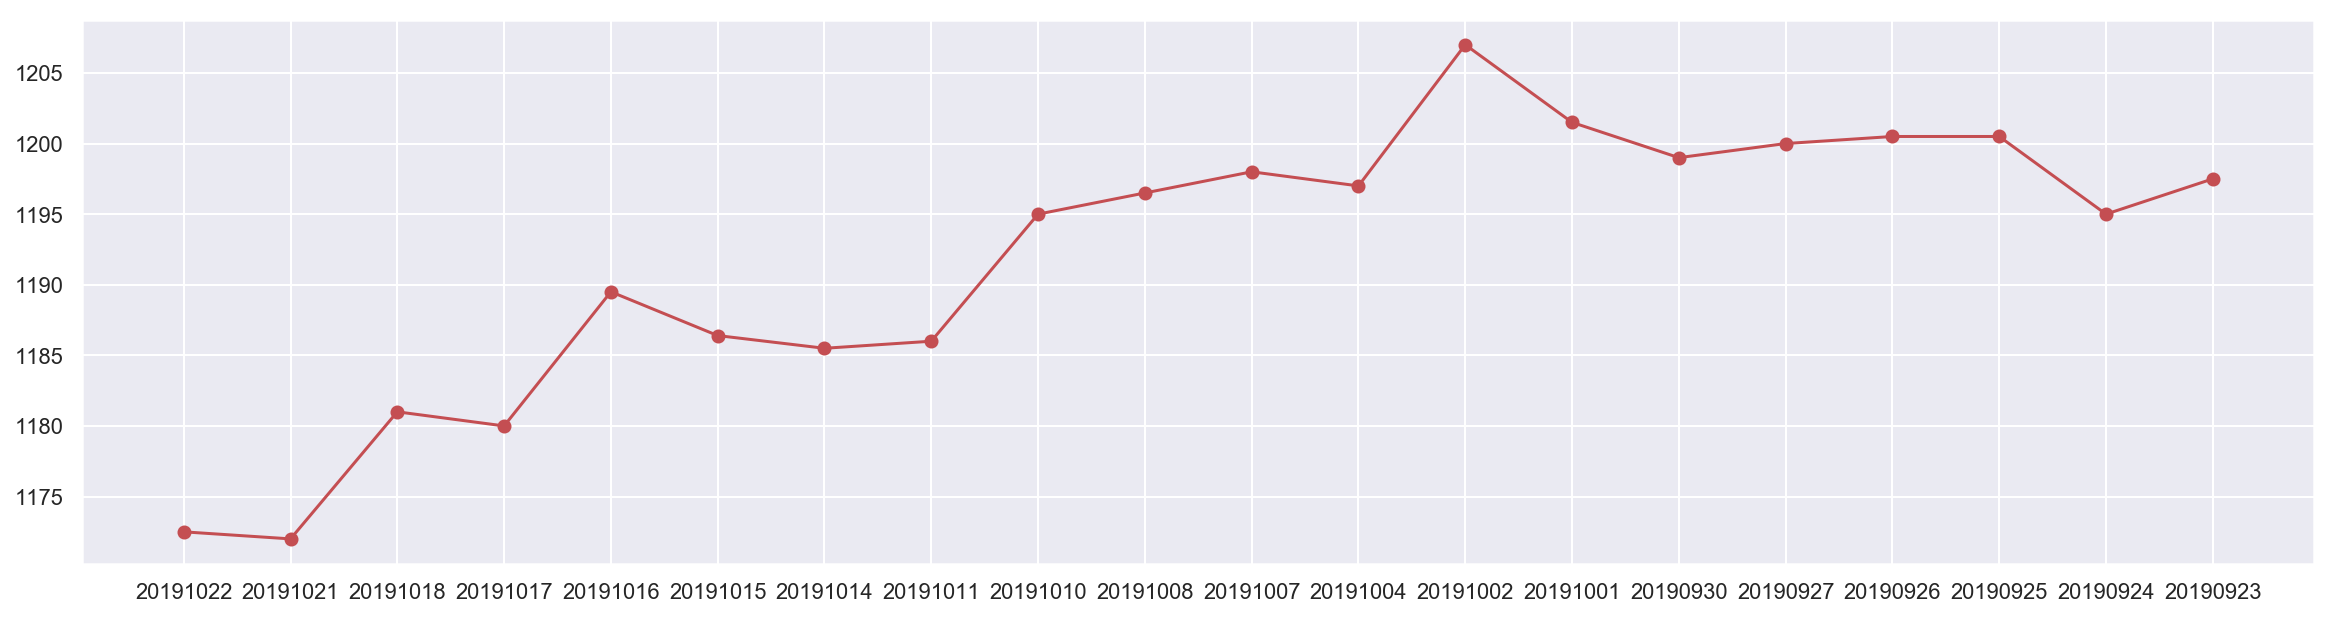

In [31]:
# 7. 종가 그래프로 그려주기

# 그려질 그래프의 크기를 설정
plt.figure(figsize=(20, 5))

# 그래프 데이터를 적용
plt.plot(er_df["날짜"], er_df["종가"], 'ro-', label="ncv")

# 그래프를 그려줌
plt.show()

In [32]:
# 8. 파일로 저장하기
with open("datas/usd_exchange_rate.pkl", "wb") as f:
    pickle.dump(er_df, f)

In [33]:
# csv 파일로 저장하기
er_df.to_csv("datas/usd_exchange_rate.csv", index=False)

### 2.4 종가 데이터 정규화
- 코스닥, 코스피, 달러환율의 종가를 비교하는 그래프를 그려기
- 종가 데이터를 정규화하여 비교

In [34]:
kospi_df.tail(2)

,시장,등락률,전일대비,날짜,고가,저가,종가,시가
18,KOSPI,0.45,9.34,20190924,2101.63,2085.91,2101.04,2090.19
19,KOSPI,0.01,0.18,20190923,2095.54,2085.60,2091.70,2087.70


In [35]:
kosdaq_df.tail(2)

,시장,등락률,전일대비,날짜,고가,저가,종가,시가
18,KOSDAQ,-0.49,-3.16,20190924,646.60,641.17,641.85,643.45
19,KOSDAQ,-0.63,-4.06,20190923,649.22,644.39,645.01,648.81


In [36]:
# 환율
er_df.tail(2)

,현찰살때,등락율,현찰팔때,전일대비,날짜,종가,송금받을때,송금보낼때
18,1215.91,-0.21,1174.09,-2.5,20190924,1195.0,1183.3,1206.7
19,1218.45,0.76,1176.55,9.0,20190923,1197.5,1185.8,1209.2


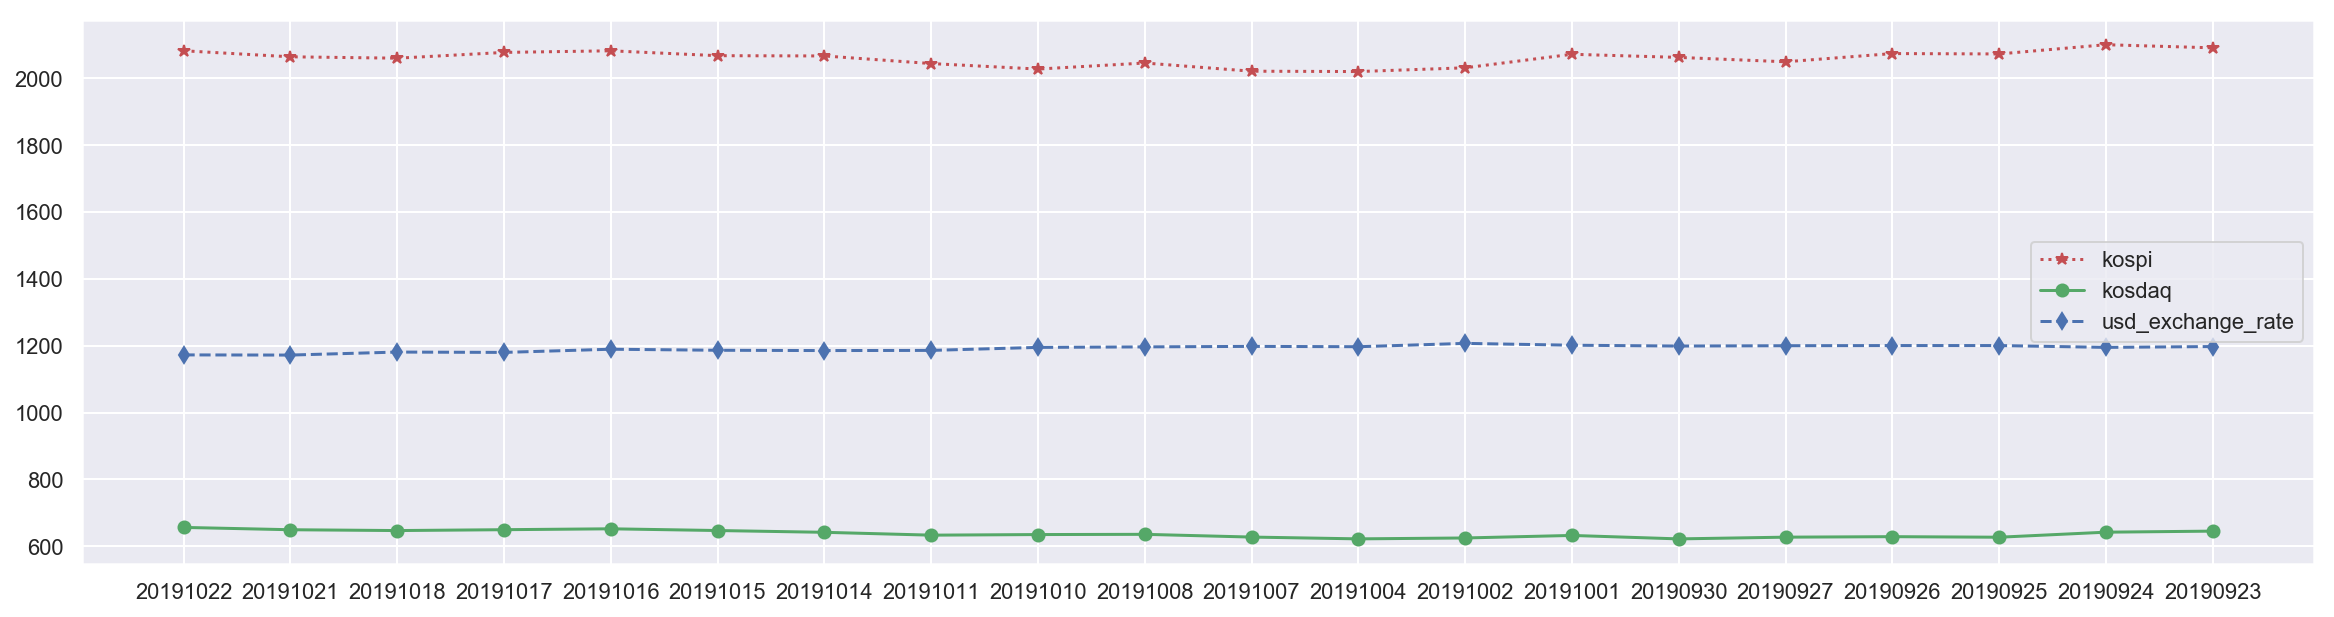

In [37]:
# 코스닥(kospi), 코스피(kosdaq_df), 달러환율(er_df) 종가 그래프 그려주기
plt.figure(figsize=(20, 5))
plt.plot(kospi_df["날짜"], kospi_df["종가"], 'r*:', label="kospi")
plt.plot(kosdaq_df["날짜"], kosdaq_df["종가"], 'go-', label="kosdaq")
plt.plot(er_df["날짜"], er_df["종가"], 'bd--', label="usd_exchange_rate")

# 범례 설정
plt.legend(loc=0)

# 그래프를 그려줌
plt.show()

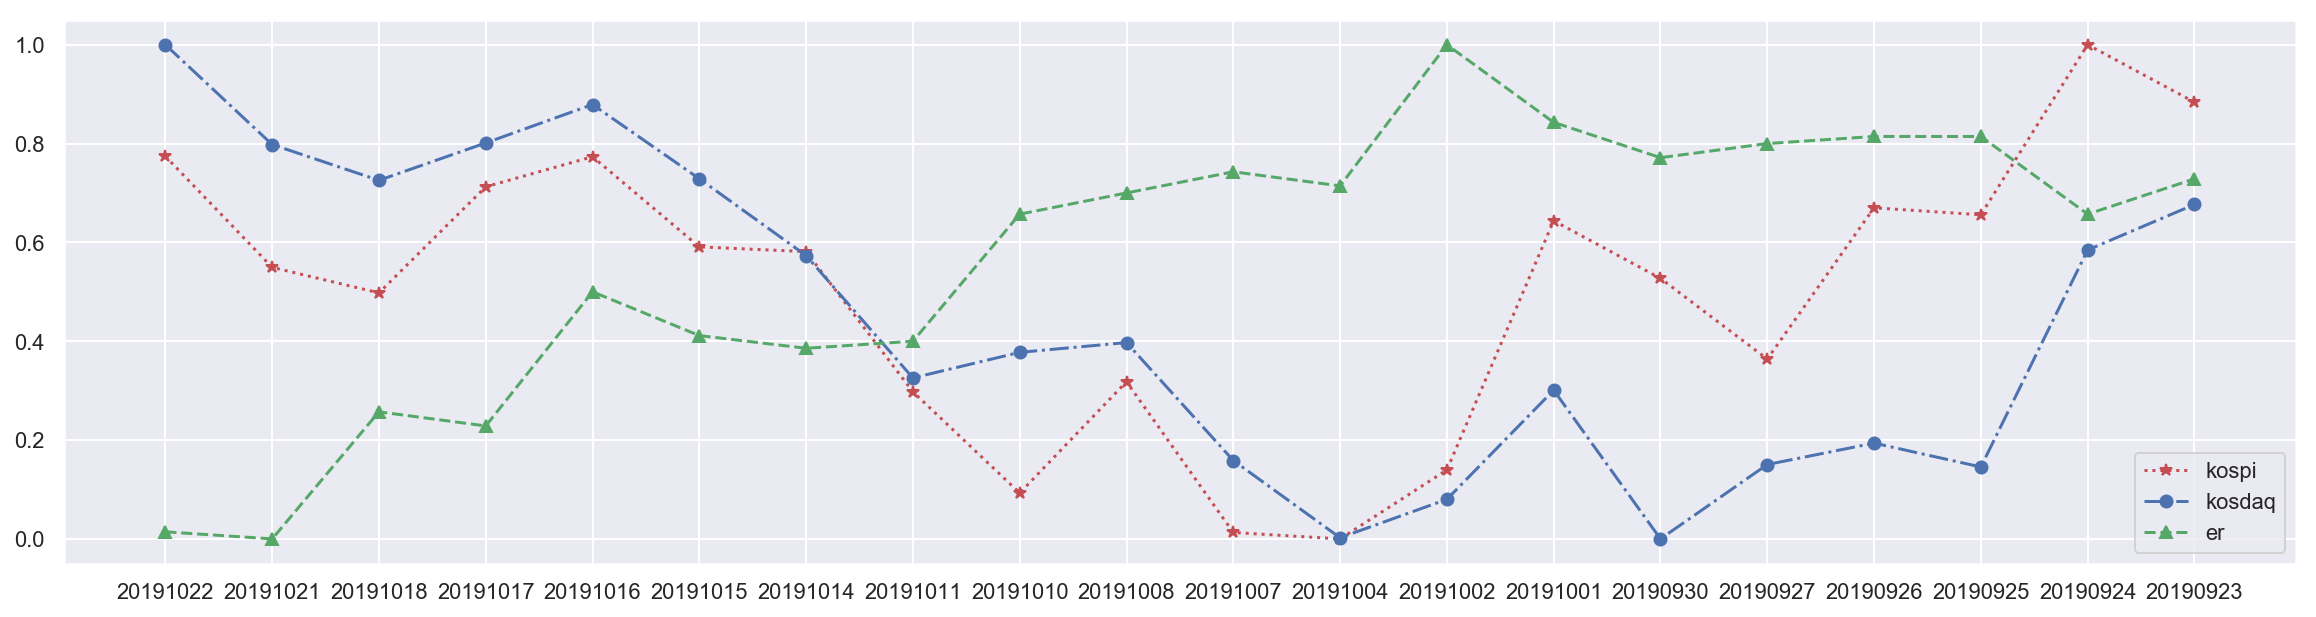

In [38]:
# 정규화 : nomalization
# z = (x - min(x)) / (max(x) - min(x))
# 0 <= z <= 1

def nomal(data, min_scale=0, max_scale=1):
    nomalization = (data - data.min()) / (data.max() - data.min())
    return nomalization * (max_scale - min_scale) + min_scale

# nomal(kospi_df["종가"], 5, 10)

plt.figure(figsize=(20, 5))

plt.plot(kospi_df["날짜"], nomal(kospi_df["종가"]), "r*:", label="kospi")
plt.plot(kosdaq_df["날짜"], nomal(kosdaq_df["종가"]), "bo-.", label="kosdaq")
plt.plot(er_df["날짜"], nomal(er_df["종가"]), "g^--", label="er")
plt.legend(loc=0)
plt.show()

In [39]:
# sklearn 패키지를 이용
from sklearn import preprocessing

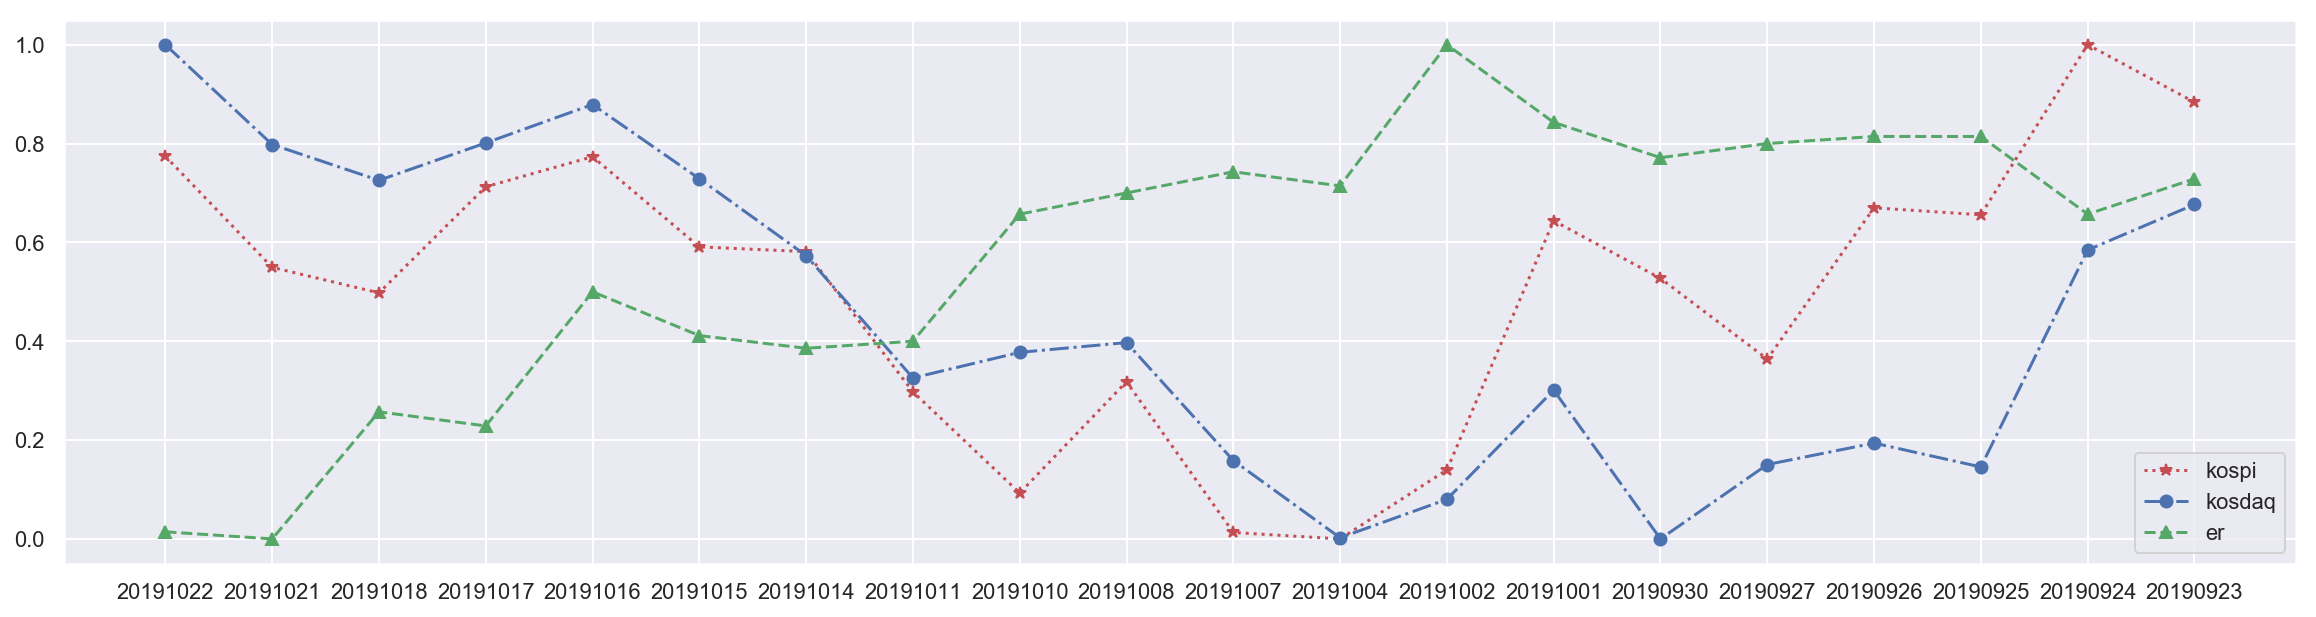

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(kospi_df["날짜"], preprocessing.minmax_scale(kospi_df["종가"]), "r*:", label="kospi")
plt.plot(kosdaq_df["날짜"], preprocessing.minmax_scale(kosdaq_df["종가"]), "bo-.", label="kosdaq")
plt.plot(er_df["날짜"], preprocessing.minmax_scale(er_df["종가"]), "g^--", label="er")
plt.legend(loc=0)
plt.show()